In [26]:
import pandas as pd
import numpy as np
import yfinance as yf
import risk_kit as rk

In [4]:
ticker = 'NVDA'

stock_data = yf.download(ticker, start = '2023-01-01', end = "2023-07-31")
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,148.509995,149.960007,140.960007,143.149994,143.110870,40127700
2023-01-04,145.669998,148.529999,142.410004,147.490005,147.449707,43132400
2023-01-05,144.910004,145.639999,141.479996,142.649994,142.611023,38916800
2023-01-06,144.740005,150.100006,140.339996,148.589996,148.549393,40504400
2023-01-09,152.839996,160.559998,151.410004,156.279999,156.237289,50423100
...,...,...,...,...,...,...
2023-07-24,447.309998,451.089996,440.399994,446.119995,446.119995,38251600
2023-07-25,449.410004,461.829987,449.230011,456.790009,456.790009,34808100
2023-07-26,460.209991,460.529999,446.299988,454.519989,454.519989,36423700


In [5]:
monthly_returns = stock_data['Adj Close'].resample('M').ffill().pct_change()
monthly_returns.dropna(inplace = True)

In [6]:
monthly_returns

Date
2023-02-28    0.188309
2023-03-31    0.196662
2023-04-30   -0.001008
2023-05-31    0.363437
2023-06-30    0.118211
2023-07-31    0.105149
Freq: M, Name: Adj Close, dtype: float64

In [7]:
adj_close = stock_data['Adj Close']
shares_outstanding = 247

monthly_market_caps = adj_close * shares_outstanding
adj_close

Date
2023-01-03    143.110870
2023-01-04    147.449707
2023-01-05    142.611023
2023-01-06    148.549393
2023-01-09    156.237289
                 ...    
2023-07-24    446.119995
2023-07-25    456.790009
2023-07-26    454.519989
2023-07-27    459.000000
2023-07-28    467.500000
Name: Adj Close, Length: 143, dtype: float64

In [8]:
monthly_market_caps

Date
2023-01-03     35348.384979
2023-01-04     36420.077637
2023-01-05     35224.922668
2023-01-06     36691.699997
2023-01-09     38590.610489
                  ...      
2023-07-24    110191.638794
2023-07-25    112827.132111
2023-07-26    112266.437286
2023-07-27    113373.000000
2023-07-28    115472.500000
Name: Adj Close, Length: 143, dtype: float64

In [9]:
stock_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

start_date = '1995-01-01'
end_date = '2023-07-31'

# Fetch data and calculate monthly returns
returns = pd.DataFrame()

for ticker in stock_tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data['Adj Close'].resample('M').ffill().pct_change()
    returns[ticker] = data

# Drop the first row since it will have NaN value (due to pct_change calculation)
returns

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,GOOGL,AMZN
Date,,,,
1995-01-31,NaN,NaN,NaN,NaN
1995-02-28,-0.018981,0.061052,NaN,NaN
1995-03-31,-0.107597,0.128969,NaN,NaN
1995-04-30,0.085107,0.149386,NaN,NaN
1995-05-31,0.089615,0.035932,NaN,NaN
...,...,...,...,...
2023-03-31,0.118649,0.155882,0.151788,0.096148
2023-04-30,0.028987,0.065765,0.034802,0.020912
2023-05-31,0.046058,0.071106,0.144681,0.143480


In [10]:
returns

,AAPL,MSFT,GOOGL,AMZN
Date,,,,
1995-01-31,NaN,NaN,NaN,NaN
1995-02-28,-0.018981,0.061052,NaN,NaN
1995-03-31,-0.107597,0.128969,NaN,NaN
1995-04-30,0.085107,0.149386,NaN,NaN
1995-05-31,0.089615,0.035932,NaN,NaN
...,...,...,...,...
2023-03-31,0.118649,0.155882,0.151788,0.096148
2023-04-30,0.028987,0.065765,0.034802,0.020912
2023-05-31,0.046058,0.071106,0.144681,0.143480


In [11]:
returns.to_csv('returns.csv')

<Axes: xlabel='Date'>

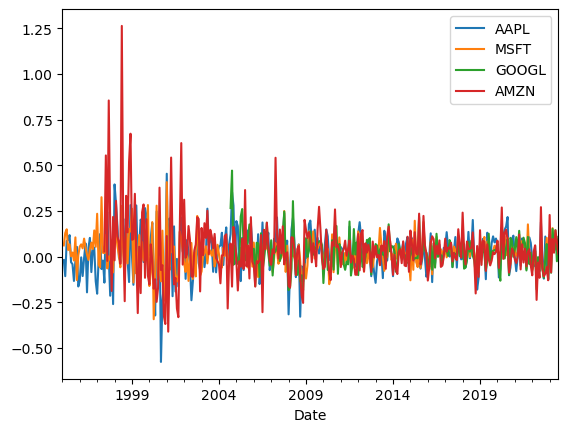

In [12]:
returns.plot()

In [13]:
def drawdown(return_series: pd.Series):
    """
    Takes a times series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    """

    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks

    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })

<Axes: xlabel='Date'>

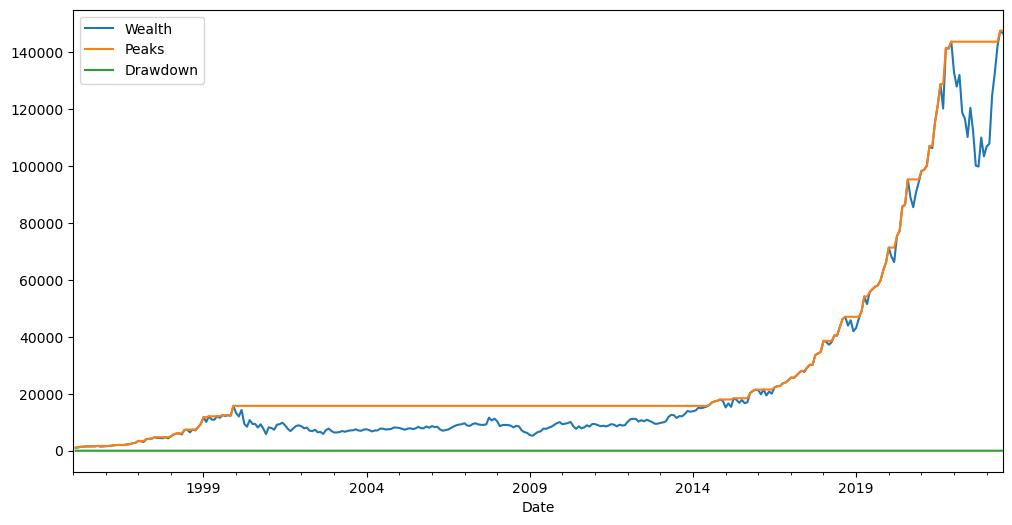

In [14]:
drawdown(returns["MSFT"]).plot.line(figsize =(12, 6))

In [15]:
rk.var_gaussian(returns, modified=True)

AAPL     0.174098
MSFT     0.109450
GOOGL    0.098899
AMZN     0.091647
dtype: float64

<Axes: >

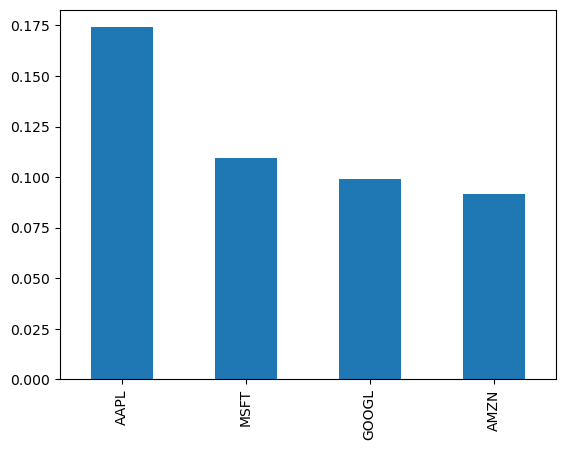

In [16]:
rk.var_gaussian(returns, modified=True).plot.bar()

- Positive Sharpe Ratio: A positive Sharpe ratio means that the investment or portfolio is generating returns higher than the risk-free rate. The higher the Sharpe ratio, the better the risk-adjusted performance.
- Negative Sharpe Ratio: A negative Sharpe ratio implies that the investment is not generating enough returns to compensate for the risk taken. In this case, the investment is not performing well relative to the risk-free rate.
- Comparison: When comparing different investments or portfolios, the one with a higher Sharpe ratio is preferred as it provides better returns for the amount of risk taken.

<Axes: >

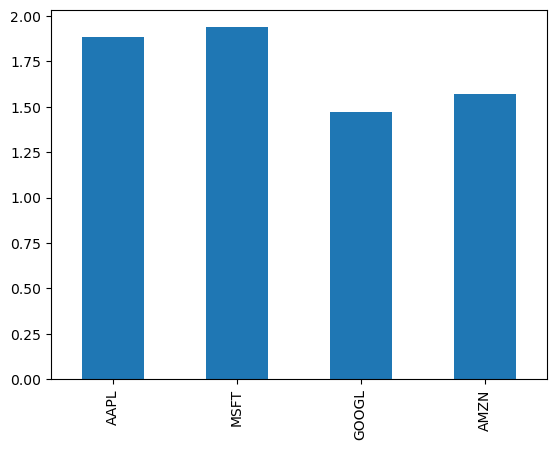

In [17]:
rk.sharpe_ratio(returns, 0, 12).plot.bar()

In [18]:
ar = rk.annualize_rets(returns, 12)

<Axes: >

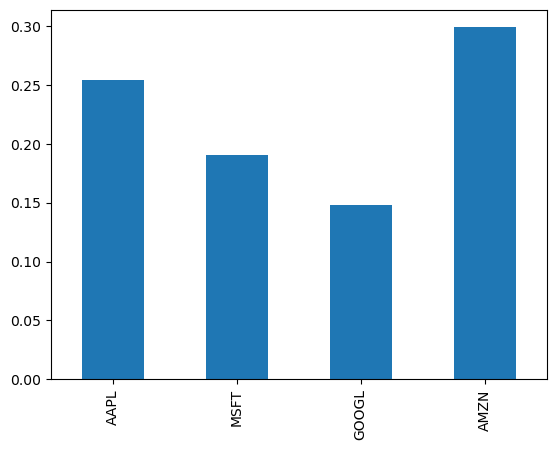

In [20]:
ar.plot.bar()

In [22]:
cov = returns.cov()

In [23]:
cov

,AAPL,MSFT,GOOGL,AMZN
AAPL,0.014184,0.003989,0.004232,0.006339
MSFT,0.003989,0.007547,0.002825,0.006210
GOOGL,0.004232,0.002825,0.007906,0.003707
AMZN,0.006339,0.006210,0.003707,0.028182


In [24]:
ar

AAPL     0.254086
MSFT     0.190610
GOOGL    0.148055
AMZN     0.298882
dtype: float64

In [27]:
weights = np.repeat(1/4, 4)

In [28]:
rk.portfolio_return(weights, ar)

0.2229082392049379

In [29]:
rk.portfolio_vol(weights, cov)

0.08382409791499014

<Axes: xlabel='Volatility'>

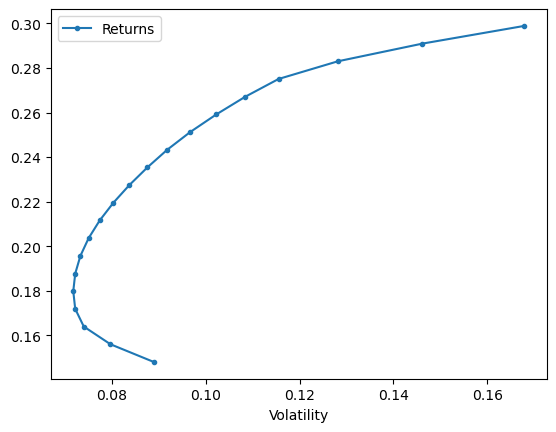

In [30]:
rk.plot_ef(20, ar, cov)

(0.0, 0.17267994759635752)

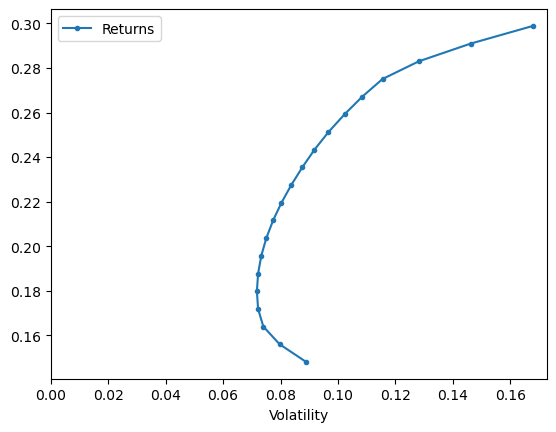

In [31]:
ax = rk.plot_ef(20, ar, cov)
ax.set_xlim(left = 0)

<Axes: xlabel='Volatility'>

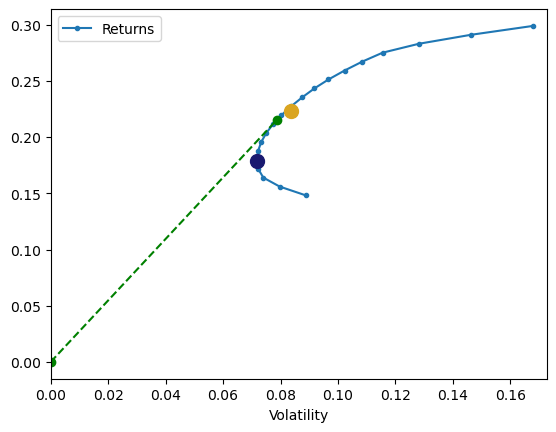

In [32]:
rk.plot_ef(20, ar, cov, show_cml=True, show_ew=True, show_gmv=True)

In [4]:
import requests
from bs4 import BeautifulSoup

# Send a GET request to the URL
url = "https://companiesmarketcap.com/apple/marketcap/"
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find the table containing the market cap data
table = soup.find("table", {"class": "table"})

# Initialize empty lists to store the data
companies = []
market_caps = []

# Loop through each row in the table
for row in table.find_all("tr")[1:]:  # Skip the header row (index 0)
    # Extract the company name and market cap from the row
    company = row.find("td").text.strip()
    market_cap = row.find_all("td")[1].text.strip()

    # Append the data to the lists
    companies.append(company)
    market_caps.append(market_cap)

# Print the data
for company, market_cap in zip(companies, market_caps):
    print(f"Year: {company}, Market Cap: {market_cap}")


Year: 2023, Market Cap: $2.910 T
Year: 2022, Market Cap: $2.066 T
Year: 2021, Market Cap: $2.901 T
Year: 2020, Market Cap: $2.255 T
Year: 2019, Market Cap: $1.287 T
Year: 2018, Market Cap: $746.07 B
Year: 2017, Market Cap: $860.88 B
Year: 2016, Market Cap: $608.96 B
Year: 2015, Market Cap: $583.61 B
Year: 2014, Market Cap: $643.12 B
Year: 2013, Market Cap: $500.74 B
Year: 2012, Market Cap: $499.69 B
Year: 2011, Market Cap: $377.51 B
Year: 2010, Market Cap: $297.09 B
Year: 2009, Market Cap: $190.98 B
Year: 2008, Market Cap: $75.99 B
Year: 2007, Market Cap: $174.03 B
Year: 2006, Market Cap: $72.98 B
Year: 2005, Market Cap: $60.79 B
Year: 2004, Market Cap: $26.05 B
Year: 2003, Market Cap: $7.88 B
Year: 2002, Market Cap: $5.16 B
Year: 2001, Market Cap: $7.71 B


In [2]:
import m_cap
%load_ext autoreload
%autoreload 2


In [22]:
db = m_cap.get_m_caps(name='alphabet-google', ticker='GOOGL')
db.to_csv('market_caps.csv', index=False)
db['GOOGL']

0     $1.653 T
1     $1.145 T
2     $1.917 T
3     $1.185 T
4    $921.13 B
5    $723.55 B
6    $729.45 B
7    $539.06 B
8    $528.16 B
9    $359.50 B
Name: GOOGL, dtype: object

In [25]:
m_cap.m_cap_db(name="apple", ticker="AAPL")

,Year,GOOGL,AAPL
0,2023,$1.653 T,$2.909 T
1,2022,$1.145 T,$2.066 T
2,2021,$1.917 T,$2.901 T
3,2020,$1.185 T,$2.255 T
4,2019,$921.13 B,$1.287 T
5,2018,$723.55 B,$746.07 B
6,2017,$729.45 B,$860.88 B
7,2016,$539.06 B,$608.96 B
8,2015,$528.16 B,$583.61 B
9,2014,$359.50 B,$643.12 B


In [26]:
m_cap.m_cap_db(name="microsoft", ticker="MSFT")

,Year,GOOGL,AAPL,MSFT
0,2023,$1.653 T,$2.909 T,$2.473 T
1,2022,$1.145 T,$2.066 T,$1.787 T
2,2021,$1.917 T,$2.901 T,$2.522 T
3,2020,$1.185 T,$2.255 T,$1.681 T
4,2019,$921.13 B,$1.287 T,$1.200 T
5,2018,$723.55 B,$746.07 B,$780.36 B
6,2017,$729.45 B,$860.88 B,$659.90 B
7,2016,$539.06 B,$608.96 B,$483.16 B
8,2015,$528.16 B,$583.61 B,$439.67 B
9,2014,$359.50 B,$643.12 B,$381.72 B


In [27]:
m_cap.m_cap_db(name="amazon", ticker="AMZN")

,Year,GOOGL,AAPL,MSFT,AMZN
0,2023,$1.653 T,$2.909 T,$2.473 T,$1.464 T
1,2022,$1.145 T,$2.066 T,$1.787 T,$856.94 B
2,2021,$1.917 T,$2.901 T,$2.522 T,$1.691 T
3,2020,$1.185 T,$2.255 T,$1.681 T,$1.634 T
4,2019,$921.13 B,$1.287 T,$1.200 T,$920.22 B
5,2018,$723.55 B,$746.07 B,$780.36 B,$737.46 B
6,2017,$729.45 B,$860.88 B,$659.90 B,$563.53 B
7,2016,$539.06 B,$608.96 B,$483.16 B,$356.31 B
8,2015,$528.16 B,$583.61 B,$439.67 B,$318.34 B
9,2014,$359.50 B,$643.12 B,$381.72 B,$144.31 B
